## Statistical Analysis Summary
This section identifies the 6th newest vehicles in the dataset, along with any missing values.


In [7]:
import pandas as pd
import numpy as np

#load the dataset
df = pd.read_csv('vehicles_data.csv', encoding="ISO-8859-1", low_memory=False)

#convert columns to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

#filter out impossible years (e.g., > 2025 or < 1900)
valid_df = df[(df['Year'] >= 1900) & (df['Year'] <= 2025)]

#sort by Year descending
df_sorted = valid_df.sort_values(by='Year', ascending=False, na_position='last')

#get the 6th newest vehicle
sixth_newest = df_sorted.iloc[5][['Year', 'Price']]

print("6th Newest Valid Vehicle:")
print(sixth_newest)

6th Newest Valid Vehicle:
Year      2023.0
Price    11513.0
Name: 30098, dtype: object


This section identifies the 4th oldest vehicles in the dataset, along with any missing values

In [8]:
#sort by Year ascending
df_sorted_oldest = valid_df.sort_values(by='Year', ascending=True, na_position='last')

#get the 4th oldest vehicle
fourth_oldest = df_sorted_oldest.iloc[3][['Year', 'Price']]

print("\n4th Oldest Valid Vehicle:")
print(fourth_oldest)


4th Oldest Valid Vehicle:
Year     1900.0
Price     500.0
Name: 339754, dtype: object


In [ ]:
Identifies and counts the number of missing values

In [9]:
#identify and count missing values
missing_values = df.isnull().sum() 
total_missing = missing_values.sum()

print("\nMissing Values per Column:")
print(missing_values)

print(f"\nTotal Missing Values in Dataset: {total_missing}")


Missing Values per Column:
Date Of Stop          0
Time Of Stop          0
Description           5
Location            831
VehicleType         829
Year               6844
Make                872
Model               956
Color             10939
Violation Type      829
Race                829
Gender             1658
Price              1658
dtype: int64

Total Missing Values in Dataset: 26250


In [10]:
#convert all findings into a dataframe table
summary_data = {
    'Analysis': ['6th Newest Vehicle', '4th Oldest Vehicle', 'Missing Values'],
    'Year': [sixth_newest['Year'], fourth_oldest['Year'], np.nan],
    'Price': [sixth_newest['Price'], fourth_oldest['Price'], np.nan],
    'Notes': [None, None, f"Total missing values: {total_missing}"]
}

summary_df = pd.DataFrame(summary_data)

#print the summary dataframe
print("\nSummary of Key Findings:")
print(summary_df)

#save the summary dataframe to csv file
summary_df.to_csv('vehicle_summary.csv', index=False)

print("\nSummary table saved as 'vehicle_summary.csv'")


Summary of Key Findings:
             Analysis    Year    Price                        Notes
0  6th Newest Vehicle  2023.0  11513.0                         None
1  4th Oldest Vehicle  1900.0    500.0                         None
2      Missing Values     NaN      NaN  Total missing values: 26250

Summary table saved as 'vehicle_summary.csv'


## Data Visualization Section

In this section, I created five unique graphs to explore different statistical insights from the vehicle dataset.  

Each graph focuses on a different aspect of the dataset and uses a unique chart type to highlight trends in vehicle years, prices, makes, colors, and violation types.   

Through these visualizations, I aimed to understand which car brands are most common, how vehicle prices change by year, and what violations or color patterns appear most often in the data.

This is a graph showing the distribution of vehicles over the years

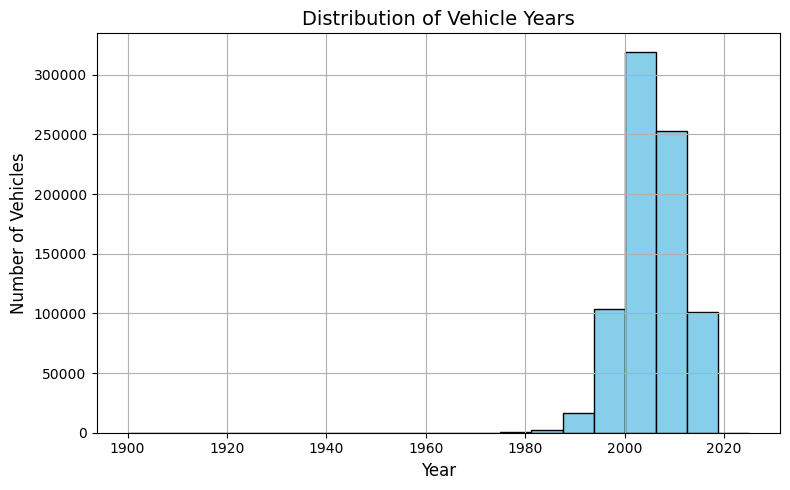

In [27]:
import matplotlib.pyplot as plt
import os

os.makedirs('figures', exist_ok=True)

#histogram of vehicle years
plt.figure(figsize=(8,5))
plt.hist(valid_df['Year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Vehicle Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/hist_vehicle_years.png', dpi=300, bbox_inches='tight')
plt.show()

This bar chart shows the average price per make (in the top 10)

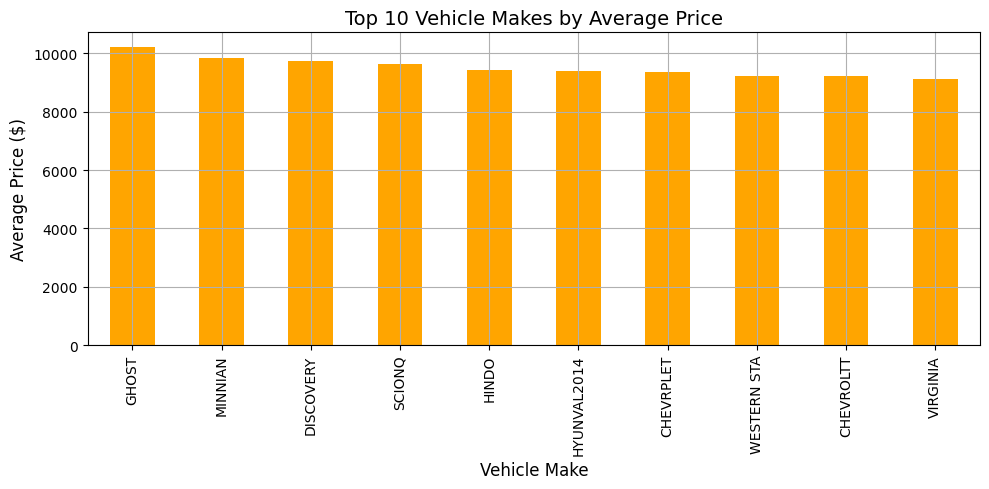

In [28]:
#bar chart of average price by make (top 10)
avg_price_by_make = valid_df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
avg_price_by_make.plot(kind='bar', color='orange')
plt.title('Top 10 Vehicle Makes by Average Price', fontsize=14)
plt.xlabel('Vehicle Make', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/bar_avg_price_by_make.png', dpi=300, bbox_inches='tight')
plt.show()

This plot shows the year alongside the price of the cars

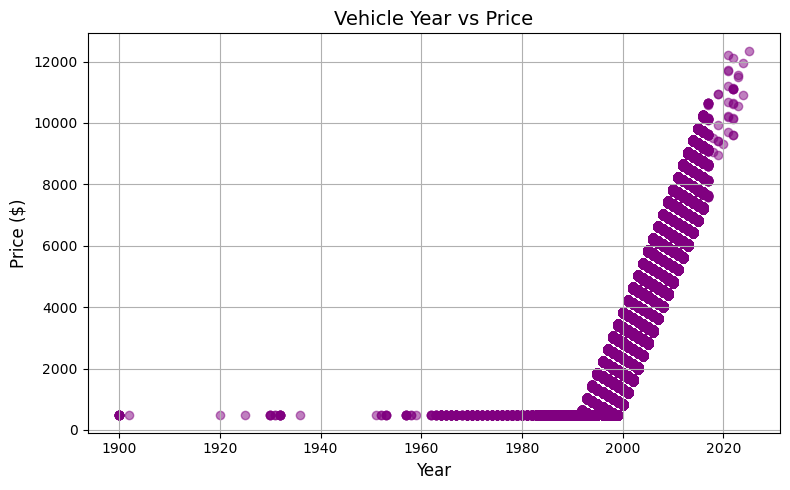

In [29]:
#scatter plot of year vs price
plt.figure(figsize=(8,5))
plt.scatter(valid_df['Year'], valid_df['Price'], alpha=0.5, color='purple')
plt.title('Vehicle Year vs Price', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/scatter_year_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()

This pie chart goes over the different colors of the vehicles and which colors are most common

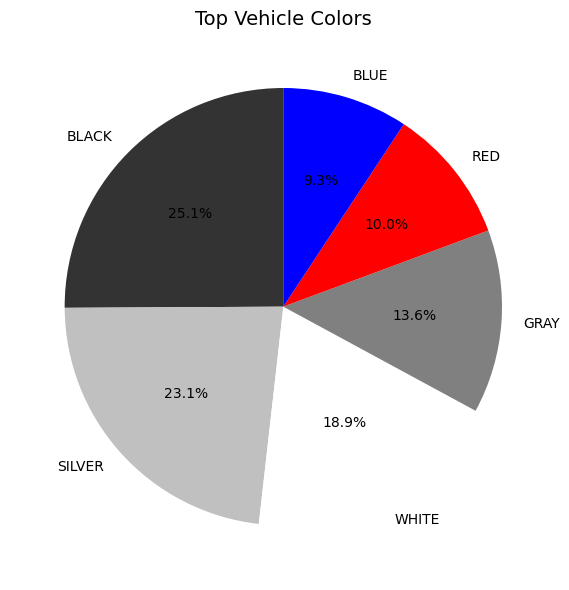

In [30]:
#pie chart of vehicle colors (top 6)
color_counts = valid_df['Color'].value_counts().head(6)

#map color names to real display colors (basic approximation)
color_map = {
    'BLACK': '#333333',
    'WHITE': 'white',
    'SILVER': 'silver',
    'GRAY': 'gray',
    'GREY': 'gray',
    'BLUE': 'blue',
    'RED': 'red',
}

slice_colors = [color_map.get(c.upper(), 'lightgray') for c in color_counts.index]

plt.figure(figsize=(6,6))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%',
        startangle=90, colors=slice_colors, textprops={'fontsize': 10})
plt.title('Top Vehicle Colors', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.savefig('figures/pie_vehicle_colors.png', dpi=300, bbox_inches='tight')
plt.show()

And finally I have a horizontal bar chart showing the violations of cars, i.g. most common violations, number of violations, and violation types

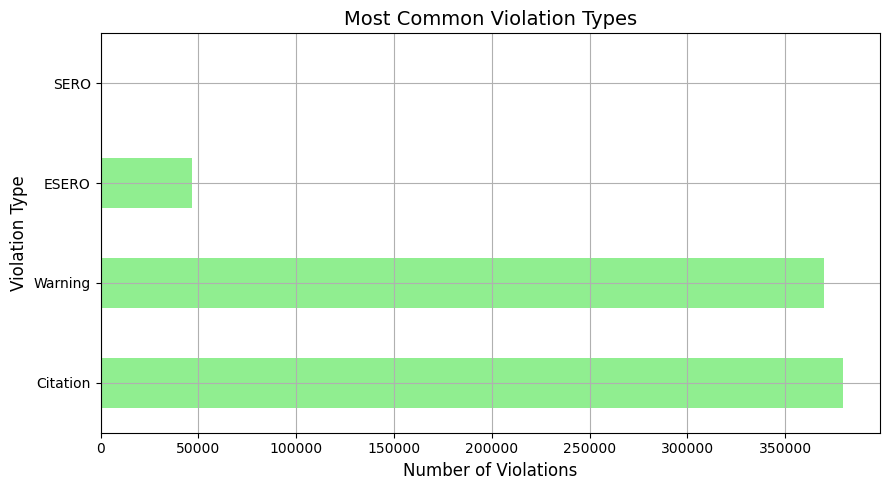

In [31]:
#horizontal bar chart of violation types
violation_counts = valid_df['Violation Type'].value_counts().head(10)
plt.figure(figsize=(9,5))
violation_counts.plot(kind='barh', color='lightgreen')
plt.title('Most Common Violation Types', fontsize=14)
plt.xlabel('Number of Violations', fontsize=12)
plt.ylabel('Violation Type', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/barh_violation_types.png', dpi=300, bbox_inches='tight')
plt.show()